# 6.6 Analysing Time-Series Data:  Wrangling and cleaning time series data

## Contents

## 1. Import libraries and files

## 2. Subset 1: Are there any notable differences in polluntant levels between different years?
### 2.1. Time series decomposition
### 2.2. Testing for stationarity
### 2.3. Stationarising the data
## 3. Hypothesis 1 tests
## 4. Hypothesis 2 tests


# 1. Import libraries and files

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how plots will appear. 


In [2]:
# Define the folder path as a string
path = r'/Users/pamnouboussi/22.06.23 Achiev 6'

In [3]:
# Read the CSV file into a DataFrame and set the index column
air_quality = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'air_quality_cleaned_updated_wrangled.csv'), index_col=0)

Data overview

In [4]:
unique_regions = air_quality['Region'].unique()
for region in unique_regions:
    print(region)

Europe (LMIC)
Europe (HIC)
Eastern Mediterranean (HIC)
Americas (LMIC)
Western Pacific (HIC)
South-East Asia (LMIC)
Americas (HIC)
Western Pacific (LMIC)
Africa (Sub-Saharan) (LMIC)
Eastern Mediterranean (LMIC)


In [5]:
# Assuming your data is stored in a DataFrame called 'df'
air_quality['Economic and Health Group'] = air_quality['Region'].map({
    'Europe (LMIC)': 'LMIC with emerging health infrastructure',
    'Europe (HIC)': 'HIC with relatively stable health infrastructure',
    'Eastern Mediterranean (HIC)': 'HIC with relatively stable health infrastructure',
    'Americas (LMIC)': 'LMIC with emerging health infrastructure',
    'Western Pacific (HIC)': 'HIC with relatively stable health infrastructure',
    'South-East Asia (LMIC)': 'LMIC with emerging health infrastructure',
    'Americas (HIC)': 'HIC with relatively stable health infrastructure',
    'Western Pacific (LMIC)': 'LMIC with emerging health infrastructure',
    'Africa (Sub-Saharan) (LMIC)': 'LMIC with high health challenges',
    'Eastern Mediterranean (LMIC)': 'LMIC with emerging health infrastructure'
})

air_quality['Geographical Proximity Group'] = air_quality['Region'].map({
    'Europe (HIC)': 'Europe',
    'Europe (LMIC)': 'Europe',
    'Americas (HIC)': 'Americas',
    'Americas (LMIC)': 'Americas',
    'Eastern Mediterranean (HIC)': 'Eastern Mediterranean',
    'Eastern Mediterranean (LMIC)': 'Eastern Mediterranean',
    'Western Pacific (HIC)': 'Western Pacific',
    'Western Pacific (LMIC)': 'Western Pacific',
    'Africa (Sub-Saharan) (LMIC)': 'Africa',
    'South-East Asia (LMIC)': 'Asia'
})

# Print the updated DataFrame
(air_quality.head())

,Region,Country,City/Town,Year,Number and type of monitoring stations,PM2.5 Annual mean cleaned,PM10 Annual mean cleaned,Number of monitoring stations,Economic and Health Group,Geographical Proximity Group
0,Europe (LMIC),Albania,Korce,2015,1 Suburban-Background,30.0,45.0,1.0,LMIC with emerging health infrastructure,Europe
1,Europe (LMIC),Albania,Korce,2016,1 Suburban-Background,29.0,40.0,1.0,LMIC with emerging health infrastructure,Europe
2,Europe (LMIC),Albania,Tirana,2013,"1 station, traffic, urban",16.0,32.0,1.0,LMIC with emerging health infrastructure,Europe
3,Europe (LMIC),Albania,Vlore,2014,1 Urban-Background,10.0,15.0,1.0,LMIC with emerging health infrastructure,Europe
4,Europe (LMIC),Albania,Vlore,2015,1 Urban-Background,13.0,19.0,1.0,LMIC with emerging health infrastructure,Europe


In [6]:
air_quality.head()

,Region,Country,City/Town,Year,Number and type of monitoring stations,PM2.5 Annual mean cleaned,PM10 Annual mean cleaned,Number of monitoring stations,Economic and Health Group,Geographical Proximity Group
0,Europe (LMIC),Albania,Korce,2015,1 Suburban-Background,30.0,45.0,1.0,LMIC with emerging health infrastructure,Europe
1,Europe (LMIC),Albania,Korce,2016,1 Suburban-Background,29.0,40.0,1.0,LMIC with emerging health infrastructure,Europe
2,Europe (LMIC),Albania,Tirana,2013,"1 station, traffic, urban",16.0,32.0,1.0,LMIC with emerging health infrastructure,Europe
3,Europe (LMIC),Albania,Vlore,2014,1 Urban-Background,10.0,15.0,1.0,LMIC with emerging health infrastructure,Europe
4,Europe (LMIC),Albania,Vlore,2015,1 Urban-Background,13.0,19.0,1.0,LMIC with emerging health infrastructure,Europe


In [7]:
air_quality.head()

,Region,Country,City/Town,Year,Number and type of monitoring stations,PM2.5 Annual mean cleaned,PM10 Annual mean cleaned,Number of monitoring stations,Economic and Health Group,Geographical Proximity Group
0,Europe (LMIC),Albania,Korce,2015,1 Suburban-Background,30.0,45.0,1.0,LMIC with emerging health infrastructure,Europe
1,Europe (LMIC),Albania,Korce,2016,1 Suburban-Background,29.0,40.0,1.0,LMIC with emerging health infrastructure,Europe
2,Europe (LMIC),Albania,Tirana,2013,"1 station, traffic, urban",16.0,32.0,1.0,LMIC with emerging health infrastructure,Europe
3,Europe (LMIC),Albania,Vlore,2014,1 Urban-Background,10.0,15.0,1.0,LMIC with emerging health infrastructure,Europe
4,Europe (LMIC),Albania,Vlore,2015,1 Urban-Background,13.0,19.0,1.0,LMIC with emerging health infrastructure,Europe


In [5]:
air_quality.shape

(11959, 8)

# 2. Subset 1 
### - Are there any notable differences in pollutant levels between different years?

In [6]:
# convert year column datetime
air_quality['Year'] = pd.to_datetime(air_quality['Year'], format='%Y')
#set year as index
air_quality.set_index('Year', inplace=True)

In [7]:
# create separate df for each polutant
#the .copy() function is used to create a separate copy of df
df_PM25 = air_quality[['PM2.5 Annual mean cleaned']].copy()
df_PM10 =air_quality[['PM10 Annual mean cleaned']].copy()


In [8]:
df_PM25.head()

,PM2.5 Annual mean cleaned
Year,
2015-01-01,30.0
2016-01-01,29.0
2013-01-01,16.0
2014-01-01,10.0
2015-01-01,13.0


In [9]:
# calcultae mean polutant level for each year
df_PM25 = df_PM25.resample('Y').mean()
df_PM10 = df_PM10.resample('Y').mean()


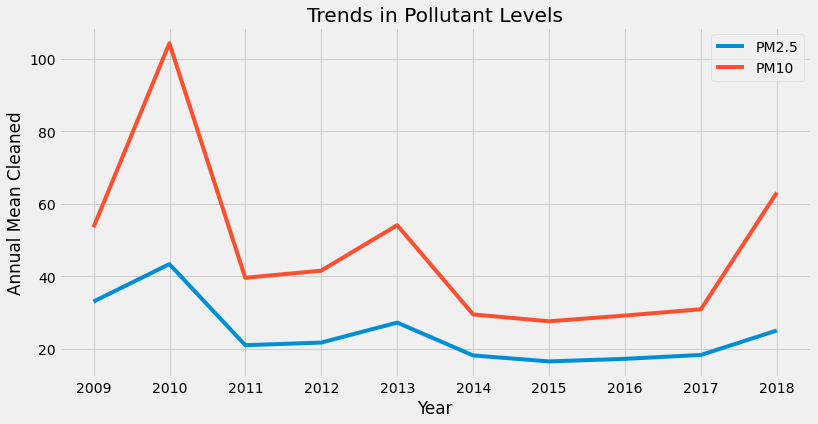

In [10]:
#create line chart of data
plt.figure(figsize=(12,6))
plt.plot(df_PM25.index, df_PM25['PM2.5 Annual mean cleaned'], label='PM2.5')
plt.plot(df_PM10.index, df_PM10['PM10 Annual mean cleaned'], label='PM10')
plt.xlabel('Year')
plt.ylabel('Annual Mean Cleaned')
plt.title('Trends in Pollutant Levels')
plt.legend()
plt.show()


## 2.1 Time series decomposition
Hypothesis
H0 (Null Hypothesis): The PM2.5 and PM10 pollutant levels time series is non-stationary.

H1 (Alternative Hypothesis): The PM2.5 and PM 10 pollutant levels time series is stationary.

In [11]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

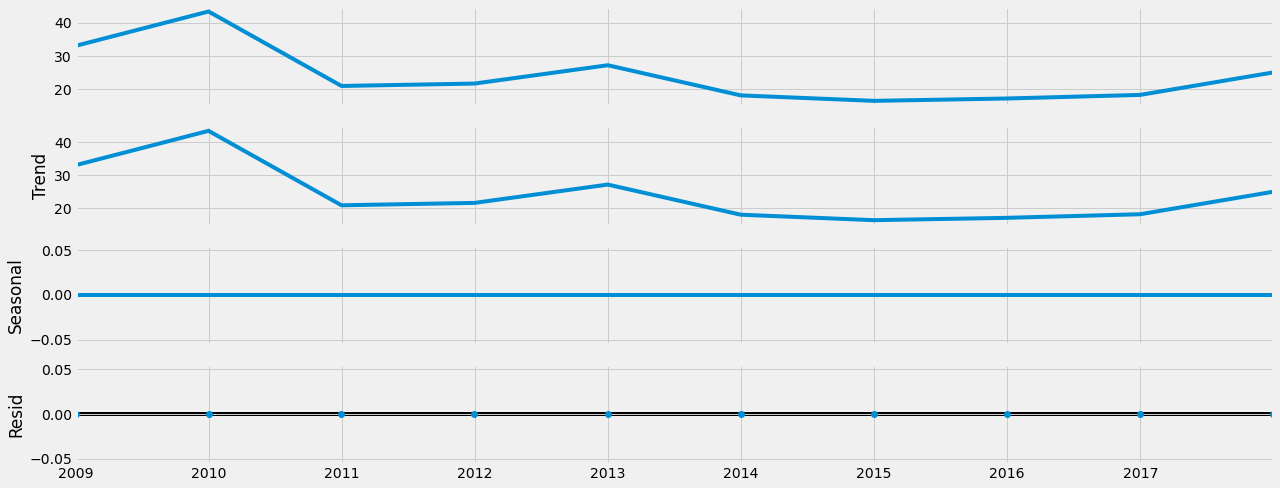

In [12]:
# Decompose the time series
decomposition_PM25 = sm.tsa.seasonal_decompose(df_PM25, model='additive')

# Plot the separate components

decomposition_PM25.plot()
plt.show()


#### - the data doesn’t have much noise (and, thus, didn’t need to be smoothed), the level and trend are the same.
#### - there is no seaonality. this makes sence as these are yearly averages recordings. 
#### - there isnt much unsexplained noise in the data

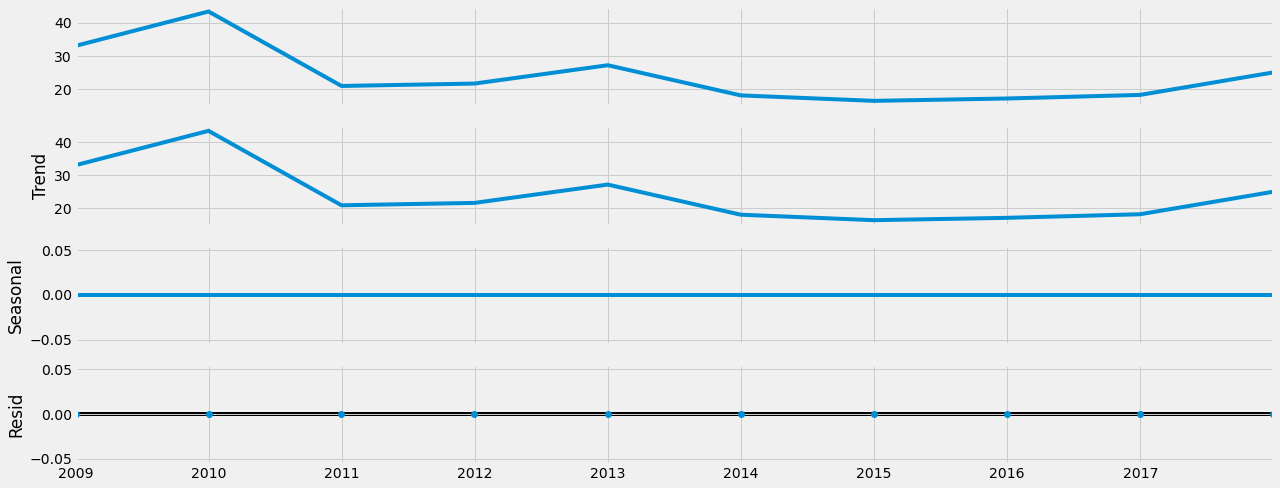

In [13]:
# Decompose the time series PM10
decomposition_PM10 = sm.tsa.seasonal_decompose(df_PM25, model='additive')

# Plot the separate components

decomposition_PM10.plot()
plt.show()

## Testing for Stationarity

In [14]:
from statsmodels.tsa.stattools import adfuller

# Define a function to perform the test and print the results
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# Test the PM2.5 data for stationarity
adf_test(df_PM25['PM2.5 Annual mean cleaned'])

# Test the PM10 data for stationarity
adf_test(df_PM10['PM10 Annual mean cleaned'])


Results of Dickey-Fuller Test:
Test Statistic                -0.357443
p-value                        0.916966
#Lags Used                     3.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 0.261482
p-value                        0.975507
#Lags Used                     3.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


- PM2.5: Test Statistic (-0.357443) is greater than the Critical Values at the 1%, 5%, and 10% levels. The null hypothesis is not rejected , the series is non-stationary.
- PM10: Test Statistic (0.261482) is greater than the Critical Values. Series non stationary

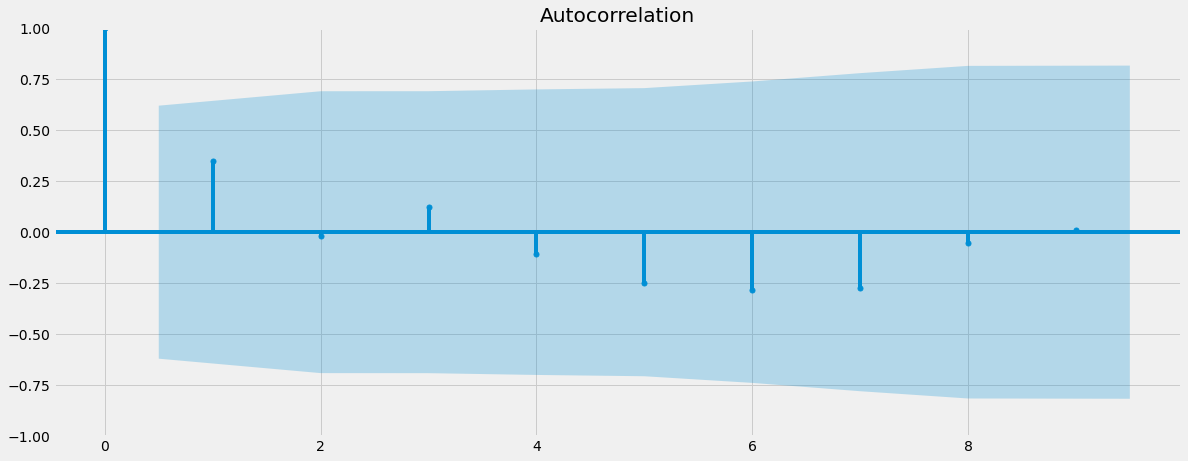

In [15]:
# Check out a plot of autocorrelations PM2.5

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_PM25)
plt.show()

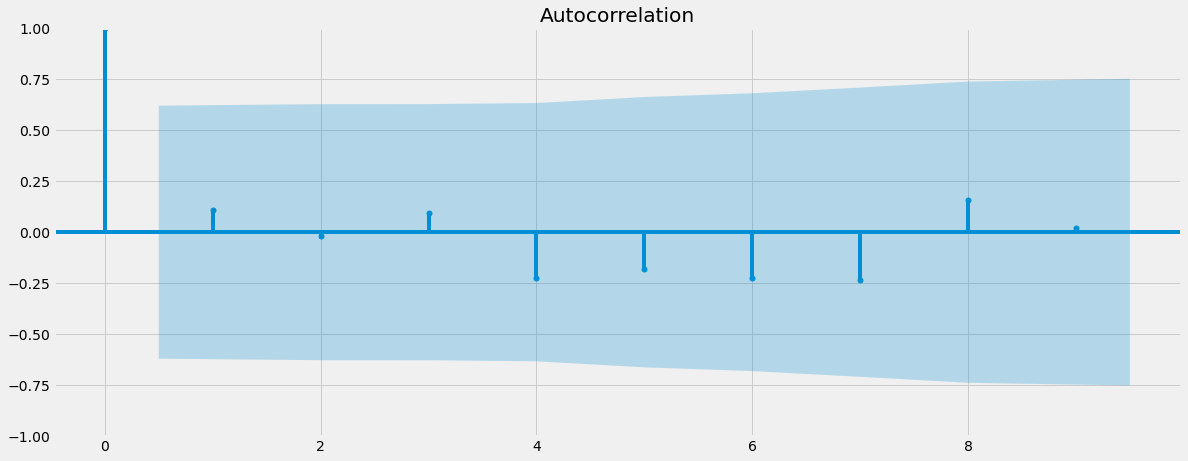

In [16]:
#plot PM10
plot_acf(df_PM10)
plt.show()


### - the lags are mostly uncorelated with each other. Most lags are within this interval.

## 2.2 Stationarising the data

### PM2.5

In [17]:
# Perform a first-order differencing on the data. drop null values
df_PM25_diff = df_PM25['PM2.5 Annual mean cleaned'].diff().dropna()

# Display the result
print(df_PM25_diff.head())


Year
2009-12-31    10.333333
2010-12-31   -22.391844
2011-12-31     0.720611
2012-12-31     5.512173
2013-12-31    -9.064365
Freq: A-DEC, Name: PM2.5 Annual mean cleaned, dtype: float64


In [18]:
# Test the differenced data for stationarity
adf_test(df_PM25_diff)


Results of Dickey-Fuller Test:
Test Statistic                 1.179236
p-value                        0.995839
#Lags Used                     2.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


In [19]:
# Perform a second-order differencing on the data
df_PM25_diff2 = df_PM25_diff.diff().dropna()

# Test the differenced data for stationarity
adf_test(df_PM25_diff2)


Results of Dickey-Fuller Test:
Test Statistic                -7.348743e+00
p-value                        1.019140e-10
#Lags Used                     1.000000e+00
Number of Observations Used    6.000000e+00
Critical Value (1%)           -5.354256e+00
Critical Value (5%)           -3.646238e+00
Critical Value (10%)          -2.901198e+00
dtype: float64


### -  Test Statistic value (-7.348743e+00 or -7.35 when rounded) is less than the Critical Values at the 1%, 5%, and 10% levels. 
### - The p-value is low , which is well below the common threshold of 0.05. 
### - the null hypothesis can be rejected

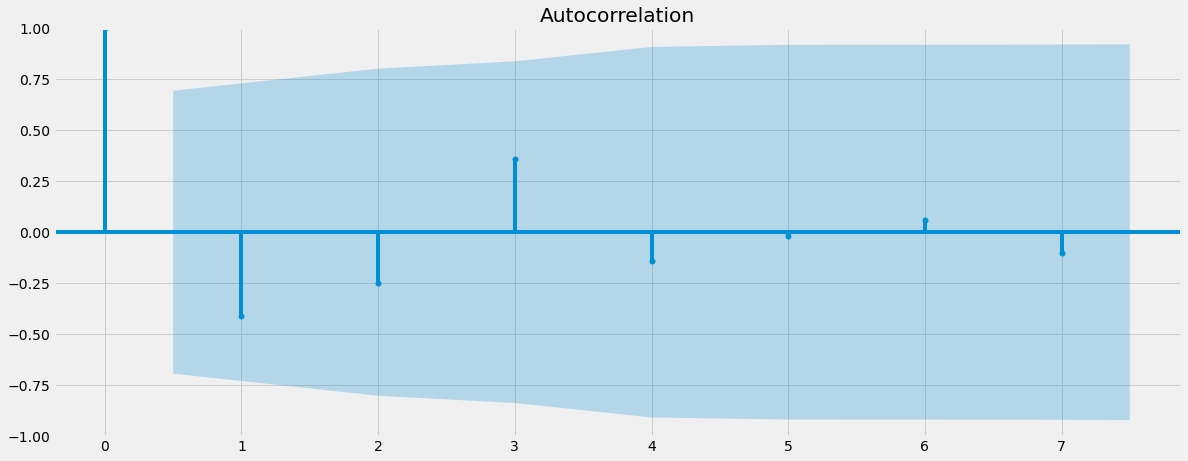

In [20]:
# plot autocorrelations
plot_acf(df_PM25_diff2)
plt.show()

### PM10

In [21]:
# Perform a first-order differencing on the data. drop null values
df_PM10_diff = df_PM10['PM10 Annual mean cleaned'].diff().dropna()

# Display the result
print(df_PM10_diff.head())


Year
2009-12-31    50.833333
2010-12-31   -64.774823
2011-12-31     1.966604
2012-12-31    12.568247
2013-12-31   -24.652062
Freq: A-DEC, Name: PM10 Annual mean cleaned, dtype: float64


In [22]:
# Test the differenced data for stationarity
adf_test(df_PM10_diff)


Results of Dickey-Fuller Test:
Test Statistic                 4.988894
p-value                        1.000000
#Lags Used                     2.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


In [23]:
# Perform a second-order differencing on the data
df_PM10_diff2 = df_PM10_diff.diff().dropna()

# Test the differenced data for stationarity
adf_test(df_PM10_diff2)


Results of Dickey-Fuller Test:
Test Statistic                 1.314103
p-value                        0.996687
#Lags Used                     2.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


### -  the seriws is still non stationary

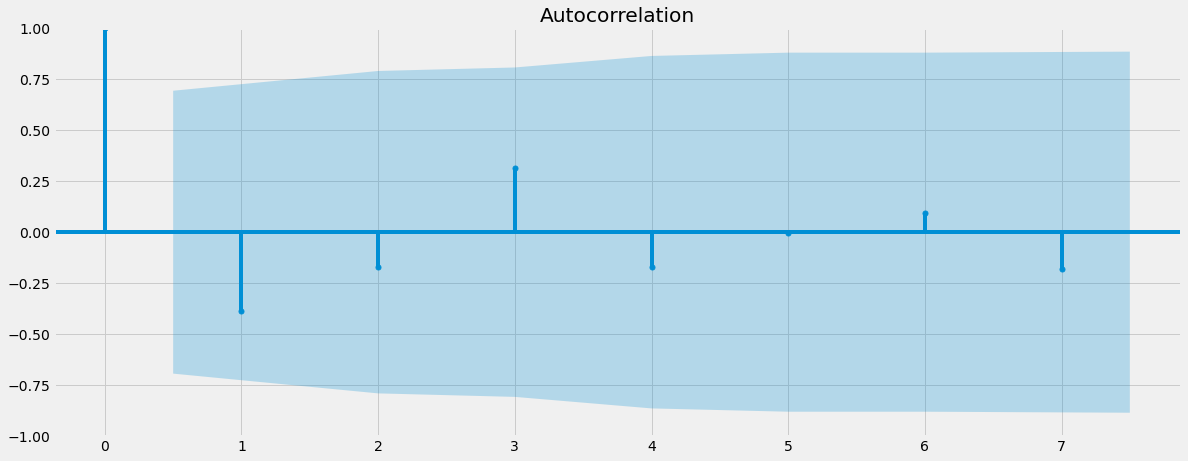

In [24]:
# plot autocorrelations
plot_acf(df_PM10_diff2)
plt.show()

# INvestigating hypothesis
### - Hypothesis 1: : There are significant differences in PM10 and PM2.5 pollutant levels across different years


Hypothesis 1 (ANOVA to compare pollutant levels across different years),

In [17]:
# Group the data by year
grouped_data = air_quality.groupby('Year')

# ANOVA for PM2.5
fvalue, pvalue = stats.f_oneway(*[group['PM2.5 Annual mean cleaned'].dropna() for name, group in grouped_data])
print('PM2.5:')
print('F-value:', fvalue)
print('P-value:', pvalue)

# ANOVA for PM10
fvalue, pvalue = stats.f_oneway(*[group['PM10 Annual mean cleaned'].dropna() for name, group in grouped_data])
print('PM10:')
print('F-value:', fvalue)
print('P-value:', pvalue)


PM2.5:
F-value: 28.646535482467886
P-value: 8.149248728187504e-50
PM10:
F-value: 53.97287690818147
P-value: 6.863901984595835e-97


#### Post-hoc Tukey HSD test

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# For example, after the ANOVA test on PM2.5 across different years
tukey = pairwise_tukeyhsd(endog=air_quality['PM2.5 Annual mean cleaned'].dropna(),  # Data
                          groups=air_quality['Year'],  # Groups
                          alpha=0.05)  # Significance level

tukey.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
2008,2009,10.3333,0.9975,-27.6265,48.2931,False
2008,2010,-12.0585,0.9843,-46.5766,22.4596,False
2008,2011,-11.3379,0.9898,-45.8303,23.1545,False
2008,2012,-5.8257,0.9999,-40.2328,28.5814,False
2008,2013,-14.8901,0.9359,-49.2403,19.4601,False
2008,2014,-16.5343,0.8832,-50.8823,17.8136,False
2008,2015,-15.829,0.9083,-50.177,18.5191,False
2008,2016,-14.7496,0.9395,-49.0971,19.5979,False
2008,2017,-8.0,0.9997,-45.6131,29.6131,False
2009,2010,-22.3918,0.0008,-38.9609,-5.8228,True


Regression analysis

In [19]:
# Regression for PM2.5
X = air_quality['Year'] 
Y = air_quality['PM2.5 Annual mean cleaned']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

# Regression for PM10
X = air_quality['Year'] 
Y = air_quality['PM10 Annual mean cleaned']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                                OLS Regression Results                               
Dep. Variable:     PM2.5 Annual mean cleaned   R-squared:                       0.004
Model:                                   OLS   Adj. R-squared:                  0.004
Method:                        Least Squares   F-statistic:                     45.33
Date:                       Sun, 09 Jul 2023   Prob (F-statistic):           1.74e-11
Time:                               19:55:17   Log-Likelihood:                -49727.
No. Observations:                      11959   AIC:                         9.946e+04
Df Residuals:                          11957   BIC:                         9.947e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

## - Hypothesis 2:  The annual mean PM10 and PM2.5 levels vary significantly across different regions

 (ANOVA to compare pollutant levels across different regions/countries)

In [13]:
# Group the data by geographical proximity
grouped_data = air_quality.groupby('Geographical Proximity Group')

# ANOVA for PM2.5
fvalue, pvalue = stats.f_oneway(*[group['PM2.5 Annual mean cleaned'].dropna() for name, group in grouped_data])
print('PM2.5:')
print('F-value:', fvalue)
print('P-value:', pvalue)

# ANOVA for PM10
fvalue, pvalue = stats.f_oneway(*[group['PM10 Annual mean cleaned'].dropna() for name, group in grouped_data])
print('PM10:')
print('F-value:', fvalue)
print('P-value:', pvalue)


PM2.5:
F-value: 1726.7198812098432
P-value: 0.0
PM10:
F-value: 2194.010446804022
P-value: 0.0


#### Post-hoc Tukey HSD test

In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# For example, after the ANOVA test on PM2.5 across different Geographiical groups
tukey = pairwise_tukeyhsd(endog=air_quality['PM2.5 Annual mean cleaned'].dropna(),  # Data
                          groups=air_quality['Geographical Proximity Group'],  # Groups
                          alpha=0.05)  # Significance level

tukey.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
Africa,Americas,-26.9285,0.0,-32.5179,-21.3392,True
Africa,Asia,18.0536,0.0,12.167,23.9401,True
Africa,Eastern Mediterranean,4.4845,0.2761,-1.5405,10.5095,False
Africa,Europe,-25.6225,0.0,-31.1713,-20.0737,True
Africa,Western Pacific,0.1937,1.0,-5.4588,5.8462,False
Americas,Asia,44.9821,0.0,42.8426,47.1216,True
Americas,Eastern Mediterranean,31.413,0.0,28.9176,33.9084,True
Americas,Europe,1.306,0.0002,0.4604,2.1517,True
Americas,Western Pacific,27.1222,0.0,25.7522,28.4922,True
Asia,Eastern Mediterranean,-13.5691,0.0,-16.6735,-10.4647,True


In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# For example, after the ANOVA test on PM2.5 across different Geographiical groups
tukey = pairwise_tukeyhsd(endog=air_quality['PM10 Annual mean cleaned'].dropna(),  # Data
                          groups=air_quality['Geographical Proximity Group'],  # Groups
                          alpha=0.05)  # Significance level

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Africa,Americas,-59.1779,0.0,-69.2237,-49.1321,True
Africa,Asia,18.4074,0.0,7.8275,28.9873,True
Africa,Eastern Mediterranean,22.4812,0.0,11.6525,33.31,True
Africa,Europe,-64.1454,0.0,-74.1182,-54.1725,True
Africa,Western Pacific,-15.608,0.0002,-25.7672,-5.4487,True
Americas,Asia,77.5853,0.0,73.7399,81.4307,True
Americas,Eastern Mediterranean,81.6591,0.0,77.1742,86.1441,True
Americas,Europe,-4.9675,0.0,-6.4874,-3.4476,True
Americas,Western Pacific,43.5699,0.0,41.1076,46.0322,True
Asia,Eastern Mediterranean,4.0738,0.2973,-1.5058,9.6534,False
